In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np
import datetime 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.linear_model import LogisticRegression as Model

In [2]:
#Open CSV File
df = pd.read_csv(r'C:\Users\cbroker1\Desktop\data.csv')

In [3]:
df.dtypes

fldScheduleId                       int64
fldClientId                         int64
fldCaseId                         float64
fldHearAboutUs                      int64
fldContactMode                      int64
fldCrisisLevelId                    int64
fldAppointmentNotes                object
fldReferalTypeId                    int64
fldSchedule                       float64
fldLocation                         int64
fldStaffId                         object
fldDate                            object
fldTime                            object
fldDuration                        object
fldOnCallYesNo                    float64
fldServiceId                      float64
fldApptOutcomeId                    int64
fldProgramListId                   object
fldClientVisitedYesNoCancelled    float64
fldFollowUpNeeded                  object
fldFollowupDate                   float64
fldDirectClientServices           float64
fldAffiliation                    float64
fldRelation                       

In [4]:
#Remove blank hh:mm:ss:ms from fldDate
df['fldDate'] = pd.to_datetime(df['fldDate']).dt.strftime("%Y-%m-%d")
df['fldDate'].head()

0    2011-07-25
1    2011-07-21
2    2011-08-04
3    2011-07-22
4    2011-08-01
Name: fldDate, dtype: object

In [5]:
#Convert dfTime from standard time to military w/ms
df['fldTime'] = pd.to_datetime(df['fldTime']).dt.strftime("%H:%M:%S")
df['fldTime'].head()

0    15:00:00
1    18:00:00
2    09:00:00
3    09:00:00
4    11:00:00
Name: fldTime, dtype: object

In [6]:
#Combine fldDate and fldTime into df.combined
df['combined'] = df['fldDate'] + ' ' + df['fldTime']
df['combined'].head()

0    2011-07-25 15:00:00
1    2011-07-21 18:00:00
2    2011-08-04 09:00:00
3    2011-07-22 09:00:00
4    2011-08-01 11:00:00
Name: combined, dtype: object

In [7]:
#Convert df['fldScheduleCreatedDt'] to the same format as df.combined
df['fldScheduleCreatedDt'] = pd.to_datetime(df['fldScheduleCreatedDt']).dt.strftime("%Y-%m-%d %H:%M:%S")
df['fldScheduleCreatedDt'].head()

0                    NaT
1                    NaT
2                    NaT
3    2011-08-15 10:45:48
4                    NaT
Name: fldScheduleCreatedDt, dtype: object

In [8]:
#Convert df.combined & df.fldScheduledDateDt into datetime64[ns]
df['combined']= pd.to_datetime(df['combined'])
df['fldScheduleCreatedDt'] = pd.to_datetime(df['fldScheduleCreatedDt'])

In [9]:
df.combined[3]

Timestamp('2011-07-22 09:00:00')

In [10]:
df.fldScheduleCreatedDt[3]

Timestamp('2011-08-15 10:45:48')

In [11]:
#Calculate time between schedule timestamp and actual appt time
df['timefromscheduled'] = df['combined'] - df['fldScheduleCreatedDt']
df['timefromscheduled'][3]

Timedelta('-25 days +22:14:12')

In [12]:
df = df.iloc[49512:70171]

In [13]:
#set plt axis
x = [df.index[df.timefromscheduled.notnull()]]
y = [df.timefromscheduled[df.index[df.timefromscheduled.notnull()]]]

TypeError: Cannot cast scalar from dtype('<m8[ns]') to dtype('<m8') according to the rule 'same_kind'

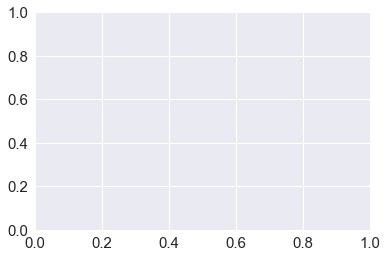

In [14]:
#plt
plt.scatter(x,y)

In [ ]:
#Save df to csv
#df.to_csv(r'C:\Users\cbroker1\Desktop\data_fig.csv')